## 파일 읽기

In [6]:
import pandas as pd
import numpy as np

df20 = pd.read_csv("news_comments_Naver_stock_20_34.csv")
df21 = pd.read_csv("news_comments_Naver_stock_21_34.csv")

## 전처리

In [8]:
df20.dropna(inplace=True)
df21.dropna(inplace=True)

data20 = np.array(df20['contents'].tolist())
data21 = np.array(df21['contents'].tolist())

df_20 = "".join(data20)
df_21 = "".join(data21)

In [9]:
from konlpy.tag import Okt

t = Okt()

df20 = t.nouns(df_20)
df21 = t.nouns(df_21)

In [11]:
print('# 20년 : ', df20[:100])
print()
print('# 21년 : ', df21[:100])

# 20년 :  ['증여', '자기', '능력', '머', '시간여행', '유튜브', '치면', '자기', '수익', '동영상', '인증', '사람', '임', '피씨', '디렉트', '종목', '분', '공시', '그', '이후', '상승', '더', '오토', '시스', '코스닥', '상', '장사', '특수', '관계', '확인', '본인', '증여', '인정', '분', '공시', '기사', '인터뷰', '유튜브', '채널', '운영', '정도', '국세청', '유료', '리딩', '거나', '남', '돈', '굴리', '사기꾼', '유튜브', '채널', '투자', '원칙', '방법', '대해', '종목', '얘기', '외국', '증권사', '근무', '부모', '끝', '일반', '서민', '누군가', '시간여행', '예전', '슈퍼', '개미', '명', '분', '공시', '개미', '우르르', '사서', '주가', '전량', '매도', '다시', '분', '공시', '개미', '사서', '상한', '가면', '기', '반복', '남한', '제지', '슈퍼', '개미', '사건', '그때', '개미', '정도', '개미', '돈', '여의도', '선물', '아저씨']

# 21년 :  ['인생', '한강', '뷰', '강물', '당', '집권', '사다리', '모든', '계층', '프로레타리아', '바', '노동', '가치', '조국', '가붕개', '살', '수', '개천', '내딸', '옛날', '빚', '집', '살', '수라도', '지금', '국민', '투기', '취급', '대출', '억압', '중꿜', '퍼주', '식구', '퍼주', '키', '인간', '세상', '작살', '내', '노동', '가보', '코인', '투기', '인생', '역전', '방법', '정권', '공정', '공평', '정의', '무너', '리', '청년', '코인', '훈계', '꼰대짓', '대부분', '인생역전', '대박', '맘', '내집마련', '결혼', '세상

In [13]:
print(type(df20))

<class 'list'>


In [26]:
# 불용어 사전

stop_words = ['때', '지금', '것', '더', '이', '말', '그', '거', '왜', '뭐', '수', '지금', '말', '그냥', '뭐', '일', '집', '놈', '니',
             '진짜', '좀']

df20 = [word for word in df20 if word not in stop_words]
df21 = [word for word in df21 if word not in stop_words]

In [27]:
# 빈도수 사전

dict_20 = {}
dict_21 = {}

for word in df20:
    dict_20[word] = dict_20.get(word, 0) + 1

for word in df21:
    dict_21[word] = dict_21.get(word, 0) + 1

s_dict_20 = sorted(dict_20, key=dict_20.get, reverse=True)
s_dict_21 = sorted(dict_21, key=dict_21.get, reverse=True)

print('# 20년 상위 20개 : ')
for key in s_dict_20[:20]:
    print(f'{repr(key)} : {dict_20[key]}')

print()
print('# 21년 상위 20개 : ')
for key in s_dict_21[:20]:
    print(f'{repr(key)} : {dict_21[key]}')    

# 20년 상위 20개 : 
'개미' : 484
'주식' : 434
'돈' : 268
'투자' : 251
'사람' : 179
'삼전' : 171
'삼성' : 160
'생각' : 154
'전자' : 119
'매수' : 105
'코로나' : 105
'빚' : 101
'바닥' : 95
'외국인' : 92
'주가' : 90
'개인' : 90
'기관' : 86
'민주당' : 73
'국민' : 72
'외인' : 71

# 21년 상위 20개 : 
'돈' : 1904
'사람' : 1446
'코인' : 1374
'주식' : 1319
'국민' : 1153
'정부' : 957
'나라' : 868
'투자' : 847
'세금' : 784
'투기' : 763
'생각' : 743
'정권' : 736
'기사' : 565
'도박' : 549
'부동산' : 547
'민주당' : 524
'재앙' : 445
'문재인' : 429
'화폐' : 375
'세상' : 369


## 수평 막대 그래프

### **2020년 3-4월**

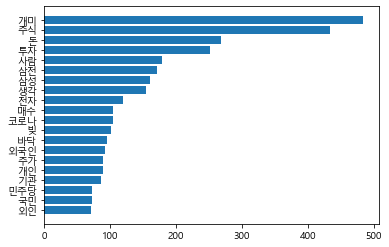

In [29]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

n = s_dict_20[:20][::-1]
w = [dict_20[key] for key in n]

plt.barh(range(len(n)), w, tick_label=n)
plt.show()

### **2021년 3~4월**

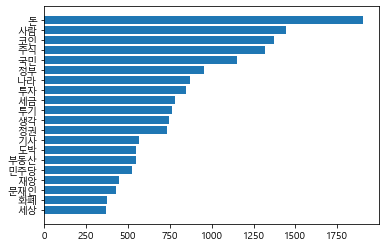

In [30]:
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

n = s_dict_21[:20][::-1]
w = [dict_21[key] for key in n]

plt.barh(range(len(n)), w, tick_label=n)
plt.show()

## 유사도 계산

In [31]:
wf_20 = s_dict_20[:1000]
wf_21 = s_dict_21[:1000]

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv20 = CountVectorizer(vocabulary=wf_20)
cv21 = CountVectorizer(vocabulary=wf_21)



# 20년
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None,
                vocabulary=['개미', '주식', '돈', '투자', '사람', '삼전', '삼성', '생각', '전자',
                            '매수', '코로나', '빚', '바닥', '외국인', '주가', '개인', '기관',
                            '민주당', '국민', '외인', '임', '개', '계속', '시작', '점', '절대',
                            '나라', '폭락', '이상', '문제', ...])



In [37]:
df20_cv = cv20.fit_transform([df_20])
df21_cv = cv21.fit_transform([df_21])

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

sim_result = cosine_similarity(df20_cv, df21_cv)
print(sim_result)

[[0.43979995]]
